Train on 6146 samples, validate on 2634 samples
Epoch 1/200
6146/6146 [==============================] - 2s 381us/step - loss: 0.0853 - val_loss: 0.0098
Epoch 2/200
6146/6146 [==============================] - 0s 41us/step - loss: 0.0335 - val_loss: 0.0103
Epoch 3/200
6146/6146 [==============================] - 0s 38us/step - loss: 0.0218 - val_loss: 0.0150
Epoch 4/200
6146/6146 [==============================] - 0s 41us/step - loss: 0.0172 - val_loss: 0.0151
Epoch 5/200
6146/6146 [==============================] - 0s 37us/step - loss: 0.0130 - val_loss: 0.0158
Epoch 6/200
6146/6146 [==============================] - 0s 38us/step - loss: 0.0090 - val_loss: 0.0085
Epoch 7/200
6146/6146 [==============================] - 0s 39us/step - loss: 0.0058 - val_loss: 0.0065
Epoch 8/200
6146/6146 [==============================] - 0s 37us/step - loss: 0.0039 - val_loss: 0.0052
Epoch 9/200
6146/6146 [==============================] - 0s 40us/step - loss: 0.0032 - val_loss: 0.0033
Epoch 10/200
61

6146/6146 [==============================] - 0s 42us/step - loss: 9.7560e-04 - val_loss: 7.1706e-04
Epoch 77/200
6146/6146 [==============================] - 0s 39us/step - loss: 9.4984e-04 - val_loss: 9.5305e-04
Epoch 78/200
6146/6146 [==============================] - 0s 49us/step - loss: 9.0822e-04 - val_loss: 0.0010
Epoch 79/200
6146/6146 [==============================] - 0s 38us/step - loss: 9.3253e-04 - val_loss: 0.0023
Epoch 80/200
6146/6146 [==============================] - 0s 40us/step - loss: 0.0010 - val_loss: 0.0016
Epoch 81/200
6146/6146 [==============================] - 0s 38us/step - loss: 9.6987e-04 - val_loss: 0.0028
Epoch 82/200
6146/6146 [==============================] - 0s 42us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 83/200
6146/6146 [==============================] - 0s 39us/step - loss: 8.9771e-04 - val_loss: 0.0011
Epoch 84/200
6146/6146 [==============================] - 0s 43us/step - loss: 9.0868e-04 - val_loss: 0.0011
Epoch 85/200
6146/6146 [========

Epoch 150/200
6146/6146 [==============================] - 0s 63us/step - loss: 9.3281e-04 - val_loss: 0.0030
Epoch 151/200
6146/6146 [==============================] - 0s 64us/step - loss: 0.0011 - val_loss: 7.0949e-04
Epoch 152/200
6146/6146 [==============================] - 0s 63us/step - loss: 8.6151e-04 - val_loss: 8.1174e-04
Epoch 153/200
6146/6146 [==============================] - 0s 62us/step - loss: 9.4208e-04 - val_loss: 0.0011
Epoch 154/200
6146/6146 [==============================] - 0s 57us/step - loss: 9.1693e-04 - val_loss: 8.3985e-04
Epoch 155/200
6146/6146 [==============================] - 0s 55us/step - loss: 9.1090e-04 - val_loss: 0.0023
Epoch 156/200
6146/6146 [==============================] - 0s 55us/step - loss: 0.0010 - val_loss: 7.1456e-04
Epoch 157/200
6146/6146 [==============================] - 0s 53us/step - loss: 8.8771e-04 - val_loss: 0.0012
Epoch 158/200
6146/6146 [==============================] - 0s 55us/step - loss: 9.2143e-04 - val_loss: 9.1148e-0

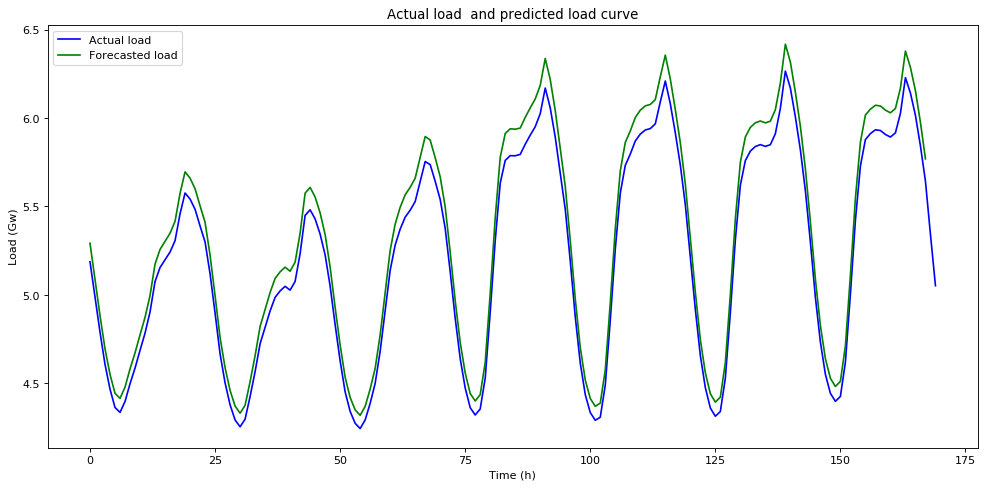

In [27]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.constraints import maxnorm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD

numpy.random.seed(7)

writer = pd.ExcelWriter("C:\\Users\\asus\\Desktop\\Covid19_Paper\\Data_RNN.xlsx")
dataframe = pandas.read_excel('C:\\Users\\asus\\Desktop\\Covid19_Paper\\Data\\PCA2.xlsx', header = None)
dataset = dataframe.values
    
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.9811)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 2])
    return numpy.array(dataX), numpy.array(dataY)    
      
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
    
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, 3))
testX = numpy.reshape(testX, (testX.shape[0], look_back, 3))


model = Sequential()
model.add(LSTM(100, input_shape=(look_back,3)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="rmsprop")
    
    
# train the model
model.fit(trainX, trainY, batch_size=512, epochs=200, validation_split=0.3, verbose=1)    
    

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict_extended = numpy.zeros((len(trainPredict),3))
# Put the predictions there
trainPredict_extended[:,2] = trainPredict[:,0]
# Inverse transform it and select the 5rd column.
trainPredict = scaler.inverse_transform(trainPredict_extended) [:,2]
print('trainPredict',trainPredict)
# Get something which has as many features as dataset
testPredict_extended = numpy.zeros((len(testPredict),3))
# Put the predictions there
testPredict_extended[:,2] = testPredict[:,0]
# Inverse transform it and select the 5rd column.
testPredict = scaler.inverse_transform(testPredict_extended)[:,2]
print('testPredict',testPredict)
    
trainY_extended = numpy.zeros((len(trainY),3))
trainY_extended[:,2]=trainY
trainY=scaler.inverse_transform(trainY_extended)[:,2]
    
    
testY_extended = numpy.zeros((len(testY),3))
testY_extended[:,2]=testY
testY=scaler.inverse_transform(testY_extended)[:,2]

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print( 'Test Score: %.2f RMSE' % (testScore))


#calculate mean absolute percent error
trainMAPE = mean_absolute_error(trainY, trainPredict)
print('trainMAPE: %.2f MAPE' % trainMAPE)
testMAPE = mean_absolute_error(testY, testPredict)
print('testMAPE: %.2f MAPE' % testMAPE)


#calculate mean square error
trainmse = mean_squared_error(trainY, trainPredict)
print('TrainMSE: %.2f MSE' % trainmse)
testmse = mean_squared_error(testY, testPredict)
print('TestMSE: %.2f MSE' % testmse)

trainKPI = [];
trainKPI.extend([trainMAPE,trainScore,trainmse])
testKPI = [];
testKPI.extend([testMAPE,testScore,testmse])
print('trainKPI',trainKPI)
print('testKPI',testKPI)

print('train_size',train_size)
print('test_size',test_size)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, 2] = trainPredict


# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, 2] = testPredict


df = pd.DataFrame (trainPredict)
dfTest = pd.DataFrame (testPredict)    
dfTest.to_excel(writer)
writer.save()    

Re = dataframe.values[train_size:len(dataset),2]
Pre = pandas.read_excel("C:\\Users\\asus\\Desktop\\Covid19_Paper\\Data_RNN.xlsx", header = None)
Forec = Pre.values[1:,1]
plt.figure(figsize=(15, 7), dpi=80)
plt.title('Actual load  and predicted load curve')
plt.plot(Re, 'b-', label='Actual load')
plt.plot(Forec, 'g-', label='Forecasted load')
plt.ylabel('Load (Gw)')
plt.xlabel('Time (h)')
plt.legend()
plt.savefig('Loadforecasting.jpg', dpi=80, transparent=True)
plt.show()

In [ ]:
names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W']

In [ ]:
0.9811    یک هفته

In [ ]:
0.9972    یک روز

In [13]:
testPredict

array([5.00363169, 4.7990579 , 4.63387227, 4.51716826, 4.44704741,
       4.40586127, 4.43755769, 4.56546815, 4.74919899, 4.88081346,
       4.95872613, 4.99204886, 5.03785614, 5.13922259, 5.16110391,
       5.17053199, 5.21166049, 5.29018178, 5.47182379, 5.59387861,
       5.45869999, 5.31576633, 5.21771218, 5.13420634, 4.97657991,
       4.77563825, 4.51697328, 4.38582206, 4.30168262, 4.25670835,
       4.26390369, 4.35541028, 4.50581648, 4.63658415, 4.77476072,
       4.86380687, 4.95202202, 5.04475044, 5.06058543, 5.04181286,
       5.00965578, 5.06044322, 5.24300734, 5.45358874, 5.41571218,
       5.31449271, 5.21919589, 5.10345601, 4.91679199, 4.68892563,
       4.49505783, 4.36834027, 4.31648979, 4.28915643, 4.29757643,
       4.38373138, 4.51655525, 4.64683884, 4.81491737, 5.00167884,
       5.18770683, 5.30368811, 5.35896502, 5.39973956, 5.40634018,
       5.45164408, 5.61070174, 5.76724044, 5.70100015, 5.52426593,
       5.39152648, 5.22478399, 4.97809211, 4.71389415, 4.50839

In [14]:
testY

array([4.9874, 4.7891, 4.6067, 4.4669, 4.3629, 4.3352, 4.3968, 4.4969,
       4.5857, 4.6859, 4.7831, 4.9034, 5.0746, 5.1545, 5.1987, 5.242 ,
       5.3061, 5.4579, 5.5756, 5.5417, 5.4838, 5.3896, 5.2991, 5.119 ,
       4.8971, 4.6663, 4.5024, 4.3782, 4.2927, 4.2538, 4.2965, 4.4245,
       4.5652, 4.7232, 4.8162, 4.9088, 4.9855, 5.022 , 5.0481, 5.0266,
       5.0756, 5.2331, 5.4491, 5.4808, 5.4292, 5.3433, 5.2259, 5.0497,
       4.8314, 4.6266, 4.4513, 4.3411, 4.2737, 4.2438, 4.2923, 4.3859,
       4.4991, 4.6807, 4.9083, 5.1383, 5.2811, 5.3714, 5.4392, 5.4786,
       5.5274, 5.6405, 5.7537, 5.7365, 5.6423, 5.5392, 5.3763, 5.1318,
       4.8679, 4.6397, 4.4735, 4.3618, 4.3206, 4.3547, 4.5286, 4.9012,
       5.3057, 5.6312, 5.76  , 5.787 , 5.7863, 5.7941, 5.8516, 5.9028,
       5.9508, 6.0246, 6.1692, 6.0572, 5.8914, 5.6878, 5.4839, 5.1919,
       4.8756, 4.6142, 4.4362, 4.3343, 4.2907, 4.308 , 4.4894, 4.8554,
       5.2578, 5.5747, 5.7321, 5.7958, 5.8698, 5.9089, 5.9322, 5.94  ,
      

In [ ]:
# build the model
model = Sequential()
# layer 1: LSTM
model.add(LSTM(input_dim=23, output_dim=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(output_dim=50, return_sequences=True))
model.add(Dropout(0.2))

# layer 2: LSTM
model.add(LSTM(output_dim=50, return_sequences=False))
model.add(Dropout(0.2))

# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(output_dim=1, activation='linear'))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(look_back,23)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="rmsprop")

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(look_back,23)))
model.add(Dense(50, kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dense(25, kernel_initializer= 'uniform', activation= 'relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer='rmsprop')